<a href="https://colab.research.google.com/github/ahcamachod/2162-clasificacion-validacion-de-modelos-y-metricas/blob/proyecto-final/Clasificacion_validacion_y_metricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Alumno: Pablo Matías Monsalvo G8-ONE 02/07/2025

# <font color='dark'>**Clasificación: Validación de modelos y métricas de evaluación**</h1>

### Proyecto

Una empresa de financiamiento de automóviles está atravesando una situación complicada, con una alta demanda para una flota reducida de vehículos y un alto número de morosos, lo que está generando grandes pérdidas para la empresa.

Nosotros fuimos contratados para buscar mejoras en la identificación de morosos. El análisis de los clientes actualmente se realiza de forma manual, cliente por cliente, lo que consume mucho tiempo y, aun así, la detección de morosos es muy imprecisa.

Nuestra tarea es utilizar los datos proporcionados por la empresa para **clasificar** a los clientes en cumplidores y morosos.

## <font color='dark'>Clasificando los datos</h1>

### Creando un modelo inicial

In [1]:
import pandas as pd

In [2]:
datos = pd.read_csv('../data/prestacar.csv')

In [5]:
datos.head(3)

,ingresos_cliente,anualidad_prestamo,años_casa_propia,telefono_trab,evaluacion_ciudad,score_1,score_2,score_3,score_social,cambio_telefono,moroso
0,12600.0,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.0,0
1,9000.0,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.0,0
2,15750.0,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.0,0


In [3]:
X = datos.drop(columns='moroso',axis=1)
y = datos.moroso

In [4]:
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier()
modelo.fit(X,y)
modelo.score(X,y)

1.0

In [8]:
print(f'La exactitud del modelo es: {modelo.score(X,y)}')

La exactitud del modelo es: 1.0


## Luri:
¡Hola! ¡Qué bueno tenerte por aquí!

En esta clase, estamos construyendo un modelo para ayudar a una empresa financiera a identificar a los clientes que probablemente no paguen sus deudas. Imagina que eres un detective que intenta resolver un caso:

* ### El Dataset como el Escenario del Crimen:
 El dataset es como la escena del crimen, llena de pistas (datos) sobre los clientes. Cada columna (ingresos, historial crediticio, etc.) es una pista diferente.

* ### El Modelo de Clasificación como el Detective:
 El modelo de clasificación es como el detective que analiza las pistas para identificar a los culpables (los clientes que no pagarán).

* ### Entrenar el Modelo como Aprender de Casos Pasados:
 Entrenar el modelo es como mostrarle al detective casos resueltos anteriormente para que aprenda a reconocer patrones y hacer predicciones más precisas.

* ### El Árbol de Decisión como un Diagrama de Flujo:
 El árbol de decisión es como un diagrama de flujo que el detective usa para tomar decisiones basadas en las pistas. Por ejemplo, si el ingreso es bajo, entonces... si el historial crediticio es malo, entonces...

* ### La Exactitud del Modelo como la Confianza del Detective:
 La exactitud del modelo es como la confianza que tiene el detective en sus predicciones. Un modelo con alta exactitud es como un detective que rara vez se equivoca.
 
En resumen, estamos construyendo un detective (modelo) que puede analizar pistas (datos) para identificar a los clientes deudores y ayudar a la empresa financiera a tomar decisiones más informadas.

¿Te gustaría que profundicemos en algún aspecto en particular o te gustaría ver algún ejemplo adicional?

##  04 Utilidad del método score()
Durante la construcción de un modelo para clasificar transacciones bancarias como legítimas o fraudulentas, una persona científica de datos utilizó la biblioteca Scikit-Learn, que ofrece diversos algoritmos de machine learning que pueden ser utilizados para la clasificación de datos. En cada uno de estos algoritmos, el método fit() se utiliza para entrenar un modelo a partir de las variables explicativas y la variable respuesta.

Sin embargo, después del entrenamiento del modelo, se realiza un paso más mediante el uso del método score(). Seleccione la alternativa que describe de manera adecuada la finalidad de usar el score() en este contexto:

![datos-1](/home/pol/Escritorio/ipynb-alura/assets/datos-1.png)

## 05 Validando el modelo


### Validando el modelo

Evaluar el modelo con los mismos datos utilizados en el entrenamiento no es recomendable. Es necesario que la evaluación se realice con datos independientes.  

Evaluar el modelo con los propios datos de entrenamiento sería equivalente a entregar un examen con las preguntas y las respuestas a una persona y, al momento de evaluarla nuevamente, entregarle un examen con las mismas preguntas y opciones. Se espera que esa persona obtenga un buen resultado, ya que ya ha visto las respuestas y ha memorizado el resultado. Esto es diferente de haber aprendido la materia a partir de ese examen y luego presentar una prueba con contenido similar y obtener un resultado positivo.  

Con el objetivo de verificar la capacidad de generalización de un modelo, debemos dividir el conjunto de datos en tres partes: datos de entrenamiento, validación y prueba.  

- El **conjunto de entrenamiento** se utiliza para entrenar los modelos. A partir de este conjunto, los modelos identifican patrones en los datos.  

- El **conjunto de validación** se emplea para evaluar el desempeño de diferentes modelos con datos nuevos que no fueron utilizados en el entrenamiento.  

- El **conjunto de prueba** se mantiene separado desde el inicio para simular datos del mundo real. No se utiliza en ninguna etapa del entrenamiento ni de la validación, sirviendo como una estimación de la capacidad del modelo elegido para generalizar y predecir nuevos datos.

<a href="https://ibb.co/9H2Z1HZ5"><img src="https://i.ibb.co/0yZs6ysb/datos-train-test.png" alt="datos-train-test" border="0"></a>

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X,X_test,y,y_test = train_test_split(X,y,test_size=0.15,stratify=y,random_state=5)
X_train,X_val,y_train,y_val = train_test_split(X,y,stratify=y,random_state=5)

In [7]:
modelo = DecisionTreeClassifier()
modelo.fit(X_train,y_train)
print(f'La exactitud del modelo con el conjunto de entrenamiento es de: {modelo.score(X_train,y_train)}')
print(f'La exactitud del modelo con el conjunto de validación es de: {modelo.score(X_val,y_val)}')

La exactitud del modelo con el conjunto de entrenamiento es de: 1.0
La exactitud del modelo con el conjunto de validación es de: 0.8471387509798798


In [8]:
modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(X_train,y_train)
print(f'La exactitud del modelo con el conjunto de entrenamiento es de: {modelo.score(X_train,y_train)}')
print(f'La exactitud del modelo con el conjunto de validación es de: {modelo.score(X_val,y_val)}')

La exactitud del modelo con el conjunto de entrenamiento es de: 0.9205865272938444
La exactitud del modelo con el conjunto de validación es de: 0.9060186394913335


## Luri:¡Hola! Claro, puedo ayudarte con eso.

En esta clase, se explica la importancia de validar un modelo de Machine Learning utilizando diferentes conjuntos de datos. Para entenderlo mejor, podemos usar algunas analogías:

* ### El examen con respuestas:
 Imagina que le das a alguien un examen con todas las respuestas. Luego, le das el mismo examen. Es muy probable que obtenga una calificación perfecta, pero ¿realmente aprendió algo? No, solo memorizó las respuestas. En Machine Learning, esto es lo que ocurre cuando entrenamos y probamos un modelo con los mismos 
 datos: el modelo "memoriza" las respuestas y no puede generalizar bien a nuevos datos.

* ### El chef y la receta secreta:
 Un chef crea una receta secreta y la prueba con los mismos ingredientes una y otra vez. Siempre obtiene el mismo resultado, pero ¿qué pasa si usa ingredientes ligeramente diferentes? ¿La receta seguirá funcionando? Para asegurarnos de que la receta sea buena, necesitamos probarla con diferentes ingredientes y en diferentes condiciones. En Machine Learning, `esto significa usar un conjunto de datos de prueba que el modelo nunca haya visto antes`.

* ### El estudiante y los ejercicios:
 Un estudiante practica con los mismos ejercicios una y otra vez. Se vuelve muy bueno resolviendo esos ejercicios, pero ¿qué pasa si se enfrenta a un problema nuevo? Para asegurarse de que el estudiante realmente comprenda el tema, necesita practicar con una variedad de ejercicios diferentes. En Machine Learning, `esto significa usar un conjunto de datos de validación para ajustar los parámetros del modelo y evitar el sobreajuste`.
 
En resumen, `la validación de modelos` es como `asegurarnos` de que un `estudiante realmente comprenda un tema`, un `chef realmente domine una receta` o un `modelo de Machine Learning realmente pueda generalizar a nuevos datos`. Al dividir nuestros datos en conjuntos de entrenamiento, validación y prueba, podemos evaluar el rendimiento de nuestro modelo de manera más precisa y evitar el sobreajuste.

¿Te gustaría que te explicara algún concepto en particular con más detalle o con otra analogía?

##  06 Para saber más: método holdout
En el momento de validar modelos de clasificación, necesitamos verificar si el modelo está realmente generalizando, es decir, si está comprendiendo el patrón de los datos y clasificando correctamente datos nuevos. La estrategia más simple para evaluar esta generalización, conocida como holdout, consiste en dividir los datos en dos partes: un conjunto de datos de entrenamiento y otro de prueba. El conjunto de entrenamiento se utiliza para entrenar el modelo, mientras que el conjunto de prueba se usa para evaluar el rendimiento del modelo en datos no vistos anteriormente.

Con la ayuda de la imagen a continuación, analiza la ejemplificación del método holdout en funcionamiento:

![datos-3](/home/pol/Escritorio/ipynb-alura/assets/datos-3.png)

En algunos casos, especialmente cuando se realizan ajustes finos en los parámetros del modelo, es útil tener un conjunto de validación adicional. En este caso, la división se hace en tres partes: conjunto de entrenamiento, conjunto de validación y conjunto de prueba. El conjunto de validación se utiliza en la comparación de diferentes modelos, en la selección del modelo más adecuado y en el ajuste de los hiperparámetros. Mientras tanto, el conjunto de prueba sigue utilizándose para evaluar el rendimiento final del modelo elegido, después de todo el proceso de ajuste.

Por eso, cuanto más se utilizan los mismos datos para tomar decisiones sobre configuraciones de mejoras en el modelo o elección de hiperparámetros, más comprometida se vuelve la confiabilidad de esos resultados al ser generalizados para datos nuevos y no vistos. Esto ocurre porque las mejoras se hacen a partir de esos datos de validación.

Es posible percibir que las mejoras aplicadas desempeñan un papel fundamental para resolver el problema. Sin embargo, para asegurar que el rendimiento del modelo permanezca consistente en relación a los datos del mundo real, que no fueron vistos en el entrenamiento o en la mejora de los modelos, la estrategia de la división entre 3 conjuntos de datos, como se puede analizar en la imagen siguiente, ofrece una buena dirección final, ya que indica si el modelo elegido está sesgado o no en relación a los datos de validación.

![datos-4](/home/pol/Escritorio/ipynb-alura/assets/datos-4.png)

## 07 Evaluando el modelo


### Evaluando el modelo

In [9]:
from sklearn.metrics import confusion_matrix

In [10]:
y_previsto = modelo.predict(X_val)
matriz_confusion = confusion_matrix(y_val,y_previsto)
print(matriz_confusion)

[[10362   117]
 [  962    40]]


In [11]:
from sklearn.metrics import ConfusionMatrixDisplay

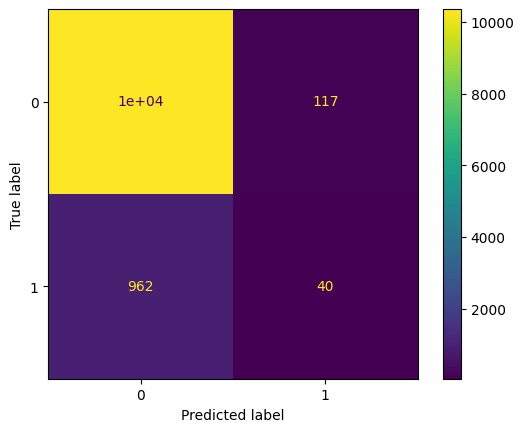

In [12]:
visualizacion = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion)
visualizacion.plot();

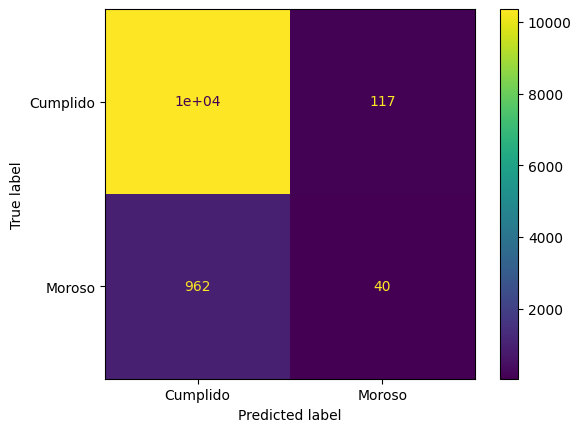

In [13]:
visualizacion = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion, display_labels=['Cumplido','Moroso'])
visualizacion.plot();

## Luri:
# Detector de Frutas: Entendiendo Precisión y Matriz de Confusión

¡Hola!  
Imagina que eres un **detector de frutas** en un supermercado. Tu trabajo es clasificar las frutas en dos categorías:

- **Manzanas**
- **No Manzanas**

---

## Precisión

Supón que tu detector de frutas es muy entusiasta y dice que casi todas las frutas son "**Manzanas**".  
En el montón de frutas, hay **90 manzanas** y **10 plátanos**.  
Tu detector dice que **95 frutas son manzanas** (¡incluyendo algunos plátanos!).

- Tu **precisión** sería alta porque acertaste con muchas de las frutas, pero **no estás haciendo un buen trabajo diferenciando manzanas de plátanos**.

> En la clase, la precisión mide qué tan bien tu modelo clasifica en general, pero **no te dice si está confundiendo "deudores" con "cumplidos" o viceversa**.

---

## Matriz de Confusión

Ahora, imagina que haces una tabla para registrar cómo tu detector de frutas está clasificando las frutas.  
La tabla se ve así:

|                     | Predicho: Manzana | Predicho: No Manzana |
|---------------------|:-----------------:|:--------------------:|
| **Realidad: Manzana**     |        85         |          5           |
| **Realidad: No Manzana**  |        10         |          0           |

- **Verdaderos Positivos (VP):** 85 manzanas fueron correctamente identificadas como manzanas.
- **Falsos Positivos (FP):** 10 plátanos fueron incorrectamente identificados como manzanas.
- **Falsos Negativos (FN):** 5 manzanas fueron incorrectamente identificadas como no manzanas.
- **Verdaderos Negativos (VN):** 0 plátanos fueron correctamente identificados como no manzanas.

---

### ¿Para qué sirve la matriz de confusión?

La matriz de confusión te muestra exactamente:

- Cuántos clientes **cumplidos** fueron correctamente identificados.
- Cuántos clientes **deudores** fueron correctamente identificados.
- Cuántos clientes **cumplidos** fueron incorrectamente identificados como **deudores** (¡un error costoso!).
- Cuántos clientes **deudores** fueron incorrectamente identificados como **cumplidos**.

---

> ¿Te sirvió la analogía para entender mejor la clase?


##  08 Para saber más: entendiendo la matriz de confusión

Para obtener una evaluación más completa del desempeño de modelos de clasificación, podemos utilizar una herramienta conocida como matriz de confusión. Esta matriz ofrece ventajas a la persona científica de datos, ya que permite entender cuántos errores y aciertos tiene las predicciones de un modelo. En lugar de una tasa de acierto general, la matriz es capaz de proporcionar información en una visualización para cada una de las categorías de la variable objetivo.

Piensa en un sistema de seguridad de un edificio que utiliza cámaras para identificar personas que entran. La "matriz de confusión" se vuelve valiosa, ya que permite verificar cuántas veces el sistema acertó al identificar correctamente a las personas autorizadas, cuántas veces acusó erróneamente a personas y cuántas veces dejó pasar a personas no autorizadas. Con estos números, es posible ajustar el sistema para minimizar falsos positivos y negativos, mejorando su precisión en la detección de visitantes.

En la representación general de una matriz de confusión, para más detalles analiza la imagen a continuación, las filas de la matriz corresponden a los valores reales de la base de datos, mientras que las columnas corresponden a los valores previstos por el modelo de clasificación. Las categorías de la variable objetivo están representadas por el valor 0 (ausencia del atributo), también llamado negativo, y por el valor 1 (presencia del atributo), también llamado positivo.

![datos-5.png](/home/pol/Escritorio/ipynb-alura/assets/datos-5.png)

Cada elemento de la matriz está identificado por un nombre de acuerdo con la intersección entre la predicción y el valor real. La diagonal principal de la matriz, que está destacada por el color verde, representa los elementos que tienen la predicción igual al valor real, por lo tanto son los aciertos del modelo. Por otro lado, la diagonal secundaria, que está destacada por el color rojo, representa los elementos con predicciones diferentes del valor real, por lo tanto son los errores del modelo. La descripción de cada uno de los elementos es la siguiente:

* **Verdaderos Negativos (VN)**: Cuando el valor real es 0 y la predicción también es 0. Indica que el modelo clasificó correctamente los valores de la clase negativa.

* **Falsos Positivos (FP)**: Cuando el valor real es 0 y la predicción es 1. Indica que el modelo clasificó erróneamente un elemento de la clase negativa como si fuera de la clase positiva.

* **Falsos Negativos (FN)**: Cuando el valor real es 1 y la predicción es 0. Indica que el modelo clasificó erróneamente un elemento de la clase positiva como si fuera de la clase negativa.

* **Verdaderos Positivos (VP)**: Cuando el valor real es 1 y la predicción también es 1. Indica que el modelo clasificó correctamente los valores de la clase positiva.

Estos valores son muy útiles para un análisis más profundo del modelo de clasificación. Esto permite identificar las capacidades y limitaciones de la predicción, si hay un equilibrio entre los aciertos y errores o si el resultado está sesgado hacia una clase en detrimento de la otra. Con esto, es evidente que la matriz de confusión es una herramienta mucho más completa que la métrica de precisión, que representa solo el porcentaje de aciertos del modelo, sin considerar las clases de manera aislada.

##  09 Matriz de confusión
Para evaluar un modelo de clasificación, podemos utilizar la precisión, que es un resultado general de aciertos del modelo expresado en porcentaje. Sin embargo, la precisión no siempre será suficiente para entender cómo está el desempeño del modelo.

Es posible utilizar la matriz de confusión para devolver un resultado más completo en relación al desempeño del modelo, conteniendo la cantidad de aciertos y errores del modelo para cada clase de la variable objetivo. Así, a partir de la matriz de confusión a continuación, que contiene los valores reales en las filas y valores predichos en las columnas y donde el valor 0 representa clientes cumplidores y 1 representa clientes morosos:

![datos-6.png](/home/pol/Escritorio/ipynb-alura/assets/datos-6.png)

Seleccione la alternativa que contiene la descripción correcta dependiendo del valor:


20 representa a los clientes morosos que el modelo clasificó correctamente como morosos.


Correcto, como la segunda fila representa a los clientes morosos reales y la segunda columna representa la predicción del modelo como morosos, 20 sería la cantidad de personas morosos que el modelo clasificó correctamente como morosos.

![datos-7.png](/home/pol/Escritorio/ipynb-alura/assets/datos-7.png)



## Luri + Perplexity IA para el formato .md:
# Entendiendo la Matriz de Confusión con la Analogía del Detective

¡Hola!  
Vamos a usar una analogía para entender mejor el enunciado del ejercicio.

---

## El Caso del Detective

Imagina que eres un **detective** intentando resolver un caso.  
En este caso, el "caso" es **clasificar a los clientes en dos grupos**:

- **Cumplidores**: Los que pagan sus cuentas a tiempo.
- **Morosos**: Los que no pagan a tiempo.

---

## ¿Qué es la Matriz de Confusión?

Piensa en la **matriz de confusión** como una tabla que te muestra qué tan bien estás haciendo tu trabajo como detective:

- **Filas**: Representan la **verdad** (si el cliente realmente es cumplidor o moroso).
- **Columnas**: Representan tus **predicciones** (cómo clasificaste a cada cliente).

---

## Analogía del Detective

- **Verdadero Positivo (VP):**  
  Clientes **morosos** que correctamente identificaste como morosos.  
  _¡Buen trabajo, detective!_

- **Verdadero Negativo (VN):**  
  Clientes **cumplidores** que correctamente identificaste como cumplidores.  
  _¡Otro caso resuelto!_

- **Falso Positivo (FP):**  
  Clientes **cumplidores** que incorrectamente identificaste como morosos (falsa alarma).  
  _¡Cuidado, detective, podrías estar acusando a alguien inocente!_

- **Falso Negativo (FN):**  
  Clientes **morosos** que incorrectamente identificaste como cumplidores (dejaste escapar al culpable).  
  _¡Ups, se te escapó uno!_

---

## Resumen

La **matriz de confusión** te ayuda a ver **dónde estás acertando y dónde te estás equivocando** como detective (o como modelo de clasificación).  
Así puedes mejorar tu estrategia para resolver casos futuros.

---

> Ahora, con esta analogía en mente, ¿puedes identificar qué representa cada valor en la matriz de confusión del ejercicio?  
> Recuerda que el objetivo es entender qué significan los números **9767, 79, 939 y 20** en el contexto de clientes cumplidores y morosos.

---

¡Espero que esta analogía te sea útil!  
Avísame si tienes más preguntas.


##  10 Desafío: construyendo un segundo modelo

Se recomienda utilizar más de un modelo de clasificación en proyectos de machine learning, para que se comparen los resultados y se elija aquel modelo que tenga un mejor desempeño, después de todos los análisis y mejoras.

Utilizamos durante la clase el algoritmo de árbol de decisión, pero la biblioteca `Scikit-Learn` tiene varios otros métodos de clasificación que pueden ser utilizados en nuestro proyecto. Como desafío, utiliza el algoritmo Random Forest para crear un modelo y evaluar el desempeño con la precisión y la `matriz de confusión`, y compara los resultados con el resultado del `árbol de decisión`.

Como un consejo, revisa la documentación del algoritmo `RandomForestClassifier`. Explora este material y observa cómo importar la función. Durante este proceso, recuerda verificar los parámetros del método para evitar que el modelo se ajuste demasiado a los datos de entrenamiento.

## Opinión del instructor

El primer paso es identificar cómo importar el algoritmo Random Forest a partir de la documentación, que siempre trae ejemplos de cómo utilizar la función. La importación se puede hacer con el siguiente código:

In [16]:
from sklearn.ensemble import RandomForestClassifier

Ahora que hemos importado el algoritmo, solo necesitamos instanciar el RandomForestClassifier en una variable y utilizar el parámetro max_depth = 10 así como hicimos con el árbol de decisión. Esto evitará que el modelo se ajuste demasiado a los datos de entrenamiento. Después de eso, podemos ajustar el modelo con datos de entrenamiento y verificar el resultado de la precisión:

In [ ]:
modelo = RandomForestClassifier(max_depth = 10)
modelo.fit(x_entrenamiento, y_entrenamiento)
print(f'Precisión de entrenamiento: {modelo.score(x_entrenamiento, y_entrenamiento)}')
print(f'Precisión de validación: {modelo.score(x_val, y_val)}')

Al ejecutar el código, obtendremos el siguiente resultado:

Precisión de entrenamiento: 0.9154761904761904

Precisión de validación: 0.9127253723543245

Este resultado muestra que el RandomForest tuvo una precisión mejor que el árbol de decisión, indicando que el modelo tiene una tasa de aciertos general mejor.

Para completar, podemos generar una matriz de confusión a partir del modelo y verificar la cantidad de aciertos y errores para cada clase. Podemos crear la matriz con el siguiente código:

In [ ]:
y_previsto = modelo.predict(x_val)
matriz_confusion = confusion_matrix(y_val, y_previsto)
visualizacion = ConfusionMatrixDisplay(confusion_matrix= matriz_confusion,
                                      display_labels = ['Cumplido', 'Moroso'])
visualizacion.plot();

Al ejecutar el código, obtendremos el siguiente resultado:

![datos-8.png](/home/pol/Escritorio/ipynb-alura/assets/datos-8.png)


A partir de esta matriz, nos damos cuenta de que a pesar de una precisión mayor, el modelo RandomForest no logra identificar casi ningún cliente moroso, indicando un resultado bastante malo en relación al modelo de árbol de decisión.

##  11 Desafío: hora de la práctica
Vamos a practicar el contenido que se presentó en la clase a partir de algunas actividades, pero utilizando un conjunto de datos diferente con datos de pacientes a ser diagnosticados con diabetes o no. Los desafíos siguen una secuencia de tareas, sirviendo como un proyecto secundario. Para realizar los desafíos, descarga la base de datos desde este enlace.

1. - Para la construcción de un modelo de machine learning se necesitan datos. Como tarea inicial, realiza la lectura de la base de datos de diabetes y divide los datos en variables explicativas y variable objetivo (x e y). La variable objetivo es la columna que quieres clasificar, que contiene la información de si el paciente tiene o no diabetes. Las variables explicativas son todas las columnas excepto la de diabetes. La separación de los datos se puede hacer con la selección de columnas con `pandas`.

2. - Una etapa muy importante en proyectos de clasificación es la validación de los modelos, para identificar si hay una generalización del modelo para datos nuevos. Realiza la división de los datos entre entrenamiento, validación y prueba. Utiliza el 5% de los datos para prueba y con el resto, deja el 25% para validación. En el momento de la separación, usa el parámetro `stratify` a partir de la variable objetivo para mantener la proporción de los datos.

3. - La etapa de modelado de datos consiste en utilizar un algoritmo capaz de identificar patrones en los datos y clasificar los valores. A partir del modelo es posible extraer una tasa de acierto para entender su desempeño. Crea 2 modelos utilizando los algoritmos DecisionTreeClassifier(https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) y RandomForestClassifier(https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) y evalúa la precisión de entrenamiento y prueba, eligiendo el valor 3 para el parámetro `max_depth` del algoritmo `DecisionTreeClassifier` y el valor 2 para el `max_depth` del algoritmo `RandomForestClassifie`r`, para que los modelos no se especialicen demasiado en el patrón de los datos de entrenamiento.

4. - La tasa de acierto generalmente no proporciona información suficiente para entender el comportamiento del modelo. La matriz de confusión es una herramienta más completa, capaz de proporcionar los aciertos y errores del modelo para cada clase. Construye una matriz de confusión para cada uno de los modelos para evaluar el desempeño de la predicción. Para construir la matriz, usa el método `predict` para generar las predicciones de los valores y comparar con los valores reales de la base de datos.

## Opinión del instructor

Solución para los desafíos

1. - Para hacer la lectura de la base de datos, debemos importar la biblioteca pandas. Hacemos esto con el código:

In [17]:
import pandas as pd

A partir de esto, podemos hacer la lectura con la función read_csv(), almacenando en una variable datos:

In [18]:
datos = pd.read_csv('../data/diabetes.csv')

Con los datos almacenados, necesitamos identificar cuál es la columna que representa la variable objetivo. Podemos explorar los datos a partir del código:

In [19]:
datos.head(3)

,glicemia,presion_sanguinea,grasa_subcutanea_triceps,insulina,imc,diabetes
0,66,23,94,28.1,0.167,0
1,40,35,168,43.1,2.288,1
2,50,32,88,31.0,0.248,1


La base de datos tiene solo 394 filas y 6 columnas. Podemos observar 6 columnas de datos: glicemia, presion_sanguinea, pliegue_cutaneo_triceps, insulina, imc y diabetes. La clasificación del modelo debe hacerse para la columna de diabetes, que presenta valores de 0 para ausencia de diabetes y 1 para presencia de diabetes, por lo tanto, esta es la variable objetivo y el resto son variables explicativas. Podemos realizar la división de los datos usando el código:

In [20]:
x = datos.drop('diabetes', axis = 1)
y = datos['diabetes']

2. - Para realizar la división de datos entre entrenamiento, validación y prueba, podemos usar el método train_test_split de la biblioteca Scikit-Learn. Primero debemos importar la función con el código:

In [21]:
from sklearn.model_selection import train_test_split

La primera división se hará de los datos de prueba y luego con el resto se hará una nueva división entre entrenamiento y validación, usando el parámetro stratify = y para mantener la proporción de los datos de la variable objetivo entre los conjuntos. Dado que la base de datos tiene pocos registros, solo se dividirá el 5% de los datos para prueba para que haya una cantidad mayor de registros en la base de datos de entrenamiento:

In [22]:
x, x_prueba, y, y_prueba = train_test_split(x, y, stratify = y, test_size = 0.05, random_state = 5)
x_entrenamiento, x_val, y_entrenamiento, y_val = train_test_split(x, y, stratify = y, random_state = 5)

3. - La primera etapa para la creación de los modelos será la importación de los algoritmos DecisionTreeClassifier y RandomForestClassifier, usando el código:

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Después de la importación de los algoritmos, podemos instanciar los modelos y almacenarlos en variables, aquí se eligieron los valores de max_depth = 3 para el DecisionTree y max_depth = 2 para el RandomForest:

In [24]:
arbol = DecisionTreeClassifier(max_depth = 3)
random_forest = RandomForestClassifier(max_depth = 2)

Para hacer el ajuste de los modelos podemos usar el método fit() y para evaluar la tasa de acierto, el método score():

In [25]:
arbol.fit(x_entrenamiento, y_entrenamiento)
print(f'Precisión de entrenamiento: {arbol.score(x_entrenamiento, y_entrenamiento)}')
print(f'Precisión de prueba: {arbol.score(x_val, y_val)}')

Precisión de entrenamiento: 0.7571428571428571
Precisión de prueba: 0.776595744680851


In [26]:
random_forest.fit(x_entrenamiento, y_entrenamiento)
print(f'Precisión de entrenamiento: {random_forest.score(x_entrenamiento, y_entrenamiento)}')
print(f'Precisión de prueba: {random_forest.score(x_val, y_val)}')

Precisión de entrenamiento: 0.7357142857142858
Precisión de prueba: 0.6914893617021277


4. - Para generar la matriz de confusión, primero es necesario importar la función ConfusionMatrixDisplay, usando el código:

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay

Hecho esto, basta con utilizar el método predict() para hacer la predicción de datos con los modelos y luego utilizar los valores reales y previstos en el método from_predictions() de la matriz de confusión:

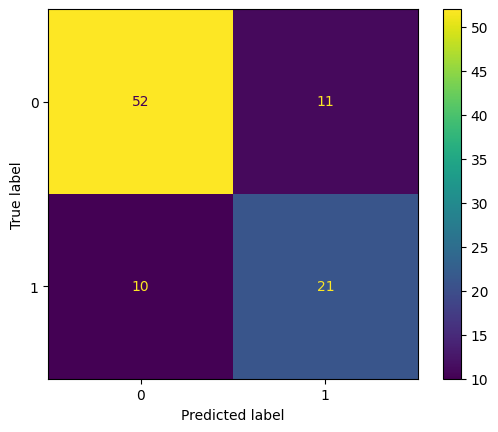

In [28]:
prediccion_arbol = arbol.predict(x_val)
ConfusionMatrixDisplay.from_predictions(y_val, prediccion_arbol);

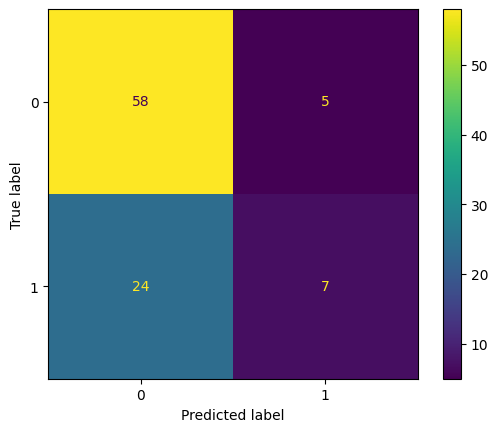

In [29]:
prediccion_rf = random_forest.predict(x_val)
ConfusionMatrixDisplay.from_predictions(y_val, prediccion_rf);

##  12 Lo que aprendimos

En esta clase, aprendiste a:

* **Crear un modelo de clasificación usando Scikit-Learn;**

* **Validar modelos a partir de la división de datos de entrenamiento, validación y prueba;**

* **Evaluar el rendimiento de los modelos usando la precisión;**

* **Analizar los aciertos y errores del modelo con la matriz de confusión.**
----

# 2 - Métricas de evaluación

## <font color='dark'>Métricas de evaluación</h1>

### Exactitud, precisión y recall (sensibilidad).

<a href="https://ibb.co/351SbY7t"><img src="https://i.ibb.co/wZypqrRD/matriz-confusion.png" alt="matriz-confusion" border="0"></a>

<a href="https://imgbb.com/"><img src="https://i.ibb.co/6Jp6rKyC/Captura-de-tela-2025-03-22-120744.png" alt="Captura-de-tela-2025-03-22-120744" border="0"></a>

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
45/(45+123) #precision

0.26785714285714285

In [ ]:
print(f'La precisión del modelo es: {precision_score(y_val,y_previsto)}')
print(f'La sensibilidad (Recall) del modelo es: {recall_score(y_val,y_previsto)}')
print(f'La exactitud (accuracy) del modelo es: {accuracy_score(y_val,y_previsto)}')

La precisión del modelo es: 0.24528301886792453
La sensibilidad (Recall) del modelo es: 0.038922155688622756
La exactitud (accuracy) del modelo es: 0.9056702377841651


In [ ]:
print(f'El F1-score del modelo es: {f1_score(y_val,y_previsto)}')

El F1-score del modelo es: 0.06718346253229975


## Luri:
¡Hola! Encantado de ayudarte a comprender mejor la clase sobre la matriz de confusión y las métricas de evaluación. Vamos a usar algunas analogías para que todo quede más claro.

Imagina que eres un chef que está probando una nueva receta de pastel de chocolate. Tu objetivo es que el pastel quede delicioso y que a todos les guste.

**Verdaderos Positivos (VP)**: Son como los pasteles que predijiste que serían deliciosos y, ¡efectivamente, lo son! A todos les encantan.

**Verdaderos Negativos (VN)**: Son como los pasteles que predijiste que no serían tan buenos y, efectivamente, no lo son. No causan mucho entusiasmo.

**Falsos Positivos (FP)**: Aquí está el problema. Son los pasteles que pensaste que serían un éxito, ¡pero resultaron ser un desastre! A nadie les gusta (Error Tipo 1).

**Falsos Negativos (FN)**: Estos son los peores. Son los pasteles que subestimaste, ¡pero resulta que son una maravilla! Te perdiste de un gran éxito (Error Tipo 2).

Ahora, las métricas de evaluación son como las herramientas que usas para medir qué tan bien estás haciendo tu trabajo como chef:

**Precisión**: De todos los pasteles que dijiste que serían deliciosos, ¿cuántos realmente lo fueron? Si tienes muchos Falsos Positivos, tu precisión será baja.

**Recall (Sensibilidad)**: De todos los pasteles deliciosos que existen, ¿cuántos pudiste identificar correctamente? Si tienes muchos Falsos Negativos, tu recall será bajo.

**Accuracy (Exactitud)**: ¿Qué tan seguido aciertas en general? Es decir, ¿cuántos pasteles clasificaste correctamente como deliciosos o no deliciosos?

**F1 Score**: Es como un promedio ponderado de la precisión y el recall. Te da una idea general de qué tan bien estás haciendo tu trabajo, tomando en cuenta tanto los Falsos Positivos como los Falsos Negativos.

En el contexto de la clase, el "pastel delicioso" es un cliente moroso, y tú quieres predecir quiénes son para evitar pérdidas financieras. Un Falso Negativo (predecir que un cliente no es moroso cuando en realidad sí lo es) es como perderse de un pastel delicioso, ¡pero en este caso, puede costarle dinero a la empresa!

Espero que esta analogía te ayude a comprender mejor la matriz de confusión y las métricas de evaluación. Si tienes más preguntas, no dudes en preguntar. ¡Estoy aquí para ayudarte!

##  03 Para saber más: cuándo usar cada métrica

Evaluar de manera adecuada el desempeño de un modelo de machine learning es esencial para asegurar que el modelo está resolviendo el problema de negocio que necesita ser solucionado. Existen diversas métricas que pueden ser utilizadas para evaluar el desempeño de los modelos de clasificación, cada una de ellas tiene ventajas y limitaciones. Estas métricas se calculan a partir de la comparación entre las clasificaciones realizadas por el modelo y los valores reales de la base de datos. Por lo tanto, pueden ser extraídas a partir de una matriz de confusión. Las principales métricas de clasificación son:

### Exactitud
Es la métrica más común y básica en problemas de clasificación. Se utiliza para medir la proporción de datos previstos correctamente por el modelo en relación al total de los datos. Esta métrica es útil cuando las clases de la variable objetivo están balanceadas, es decir, cuando hay una cantidad equilibrada de datos para cada clase y una importancia equivalente de clasificación entre las categorías. Como ejemplo de utilización, tenemos el reconocimiento de dígitos manuscritos. Podemos utilizar imágenes de caracteres de letras y números para entrenar un modelo de clasificación para identificar correctamente la escritura. Como cada letra o número no tiene una importancia mayor que los demás, la exactitud se convierte en una buena métrica para medir la capacidad del modelo en clasificar correctamente los dígitos.

A continuación, podemos analizar el cálculo de la exactitud a partir de la matriz de confusión. Se calcula sumando los aciertos del modelo (VN + VP) y dividiendo por todos los aciertos y errores (VP + VN + FP + FN).

![metrica.png](/home/pol/Escritorio/ipynb-alura/assets/metrica.png)

### Recuperación (recall)
Mide la proporción de datos positivos que fueron correctamente identificados por el modelo, es decir, revela la capacidad del modelo en evitar la clasificación incorrecta de datos positivos como negativos. Se usa cuando el riesgo o costo de clasificar falsos negativos es alto. Por ejemplo, en casos de diagnóstico de enfermedades graves, donde es fundamental detectar correctamente la presencia de la enfermedad.

A continuación, podemos constatar el cálculo del recall a partir de la matriz de confusión. El recall solo toma en cuenta los valores positivos reales, es decir, los valores de la segunda fila de la matriz. Se calcula a partir de la división entre Verdaderos Positivos (VP) y la suma de todos los positivos reales (VP + FN):

![metrica-1.png](/home/pol/Escritorio/ipynb-alura/assets/metrica-1.png)

### Precisión
Mide la proporción de datos clasificados como positivos que son realmente positivos, es decir, revela la capacidad del modelo en evitar la clasificación incorrecta de datos negativos como positivos. Se usa cuando el riesgo o costo de clasificar falsos positivos es alto, por ejemplo, en casos de selección de acciones en el mercado financiero, donde lo importante es seleccionar acciones que tengan gran probabilidad de retorno, reduciendo la cantidad de acciones malas (falsos positivos) incluso si otras buenas acciones no han sido detectadas por el modelo (falso negativo). La precisión también es importante en el ejemplo de detección de enfermedades, donde queremos evitar que pacientes sanos sean erróneamente clasificados como enfermos.

A continuación, podemos analizar el cálculo de la precisión a partir de la matriz de confusión. La precisión solo toma en cuenta los valores positivos previstos por el modelo, es decir, los valores de la segunda columna de la matriz. Se calcula a partir de la división entre Verdaderos Positivos (VP) y la suma de todos los positivos previstos (VP + FP):

![metrica-2.png](/home/pol/Escritorio/ipynb-alura/assets/metrica-2.png)

### F1-Score
Proporciona un equilibrio entre el recall y la precisión, siendo útil cuando las clases de la variable objetivo están desbalanceadas, es decir, cuando hay una cantidad de datos muy diferente para cada clase. Además, es aplicable cuando el riesgo o costo de falsos positivos y de falsos negativos es alto simultáneamente. En casos de detección de tumores en pacientes, es necesario tener un equilibrio entre evitar errores en la detección de tumores cuando la persona realmente los tiene y evitar errores al informar que una persona tiene un tumor cuando en realidad no lo tiene.

El cálculo del F1-Score se realiza a partir de la media armónica entre la precisión y el recall. Por lo tanto, equivale a 2 veces la precisión por el recall, dividido por la suma entre la precisión y el recall:

![metrica-3.png](/home/pol/Escritorio/ipynb-alura/assets/metrica-3.png)

La elección de la métrica de clasificación adecuada depende del problema que se está resolviendo y de cada escenario. En los casos en que las clases están balanceadas y tienen importancia similar, la exactitud puede ser una buena métrica inicial. Sin embargo, cuando las clases están desequilibradas o los errores tienen costos diferentes, métricas como precisión, recall y F1-score son más indicadas.




## 04 Curva ROC


### Curva ROC

In [ ]:
from IPython.display import Image
Image(url='https://raw.githubusercontent.com/dariyasydykova/open_projects/master/ROC_animation/animations/cutoff.gif')

Fuente: [paulvanderlaken.com](https://paulvanderlaken.com/2019/08/16/roc-auc-precision-and-recall-visually-explained/)




In [ ]:
from sklearn.metrics import RocCurveDisplay

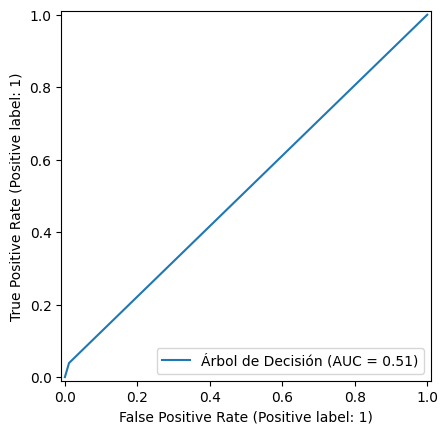

In [ ]:
RocCurveDisplay.from_predictions(y_val,y_previsto,name='Árbol de Decisión');

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
print(f'El área bajo la curva ROC es: {roc_auc_score(y_val,y_previsto)}')

El área bajo la curva ROC es: 0.5137353406556483


## Luri:
# Curva ROC: Explicación con Analogías

¡Hola! ¡Claro que sí! Vamos a entender la Curva ROC con analogías para que quede más claro.

Imagina que eres un chef que está creando un nuevo plato y necesitas evaluar qué tan bien lo estás haciendo.

## Elementos Base

* **El Plato (Modelo):** Tu nuevo plato es como tu modelo de clasificación. Quieres que sea perfecto para tus comensales.
* **Ingredientes (Datos):** Los ingredientes que usas son los datos con los que entrenas tu modelo.
* **Comensales (Clientes):** Los comensales son como los clientes a los que tu modelo intenta clasificar (morosos o cumplidos).

## Tipos de Comensales

Ahora, imagina que tienes dos tipos de comensales:

* **Amantes del Picante (Morosos):** Estos son los clientes que realmente son morosos. Quieres identificarlos correctamente.
* **Amantes del Dulce (Cumplidos):** Estos son los clientes que son cumplidos. No quieres confundirlos con los amantes del picante.

## La Curva ROC

Aquí es donde entra la Curva ROC:

* **Curva ROC (El Detector de Gustos):** La Curva ROC es como un detector de gustos que te ayuda a ajustar tu receta para satisfacer a ambos tipos de comensales.
* **Verdaderos Positivos (Identificar Amantes del Picante):** Cuando identificas correctamente a un amante del picante, es un "verdadero positivo". Quieres maximizar esto.
* **Falsos Positivos (Confundir Amantes del Dulce):** Cuando confundes a un amante del dulce con uno del picante, es un "falso positivo". Quieres minimizar esto.

## Analogía de la Curva

Imagina que tienes un control deslizante en tu detector de gustos. Al ajustar este control, puedes hacer que tu detector sea más sensible para identificar a los amantes del picante, pero a medida que lo haces, también corres el riesgo de confundir a más amantes del dulce.

* **AUC (Área Bajo la Curva):** El AUC es como la calificación general de tu detector de gustos. Si el AUC es alto (cercano a 1), significa que tu detector es muy bueno para distinguir entre amantes del picante y del dulce. Si es bajo (cercano a 0.5), es como si estuvieras adivinando al azar.

## Resumen

La Curva ROC te ayuda a encontrar el equilibrio perfecto en tu receta (modelo) para que puedas identificar a la mayor cantidad de amantes del picante (morosos) sin confundir demasiados amantes del dulce (cumplidos). El AUC te da una idea general de qué tan bien estás haciendo esto.

¿Te gustaría que te diera otro ejemplo o ejercicio para practicar este concepto?


## 05 Curva de presición vs sensibilidad


### Curva de  precisión x sensibilidad

In [ ]:
Image(url='https://paulvanderlaken.com/wp-content/uploads/2019/08/roc.gif')

Fuente: [paulvanderlaken.com](https://paulvanderlaken.com/2019/08/16/roc-auc-precision-and-recall-visually-explained/)


In [ ]:
from sklearn.metrics import PrecisionRecallDisplay

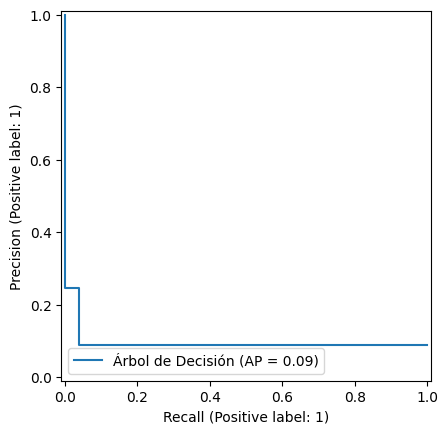

In [ ]:
PrecisionRecallDisplay.from_predictions(y_val,y_previsto, name='Árbol de Decisión');

In [ ]:
from sklearn.metrics import average_precision_score

In [ ]:
print(f'El score promedio de precision vs recall es: {average_precision_score(y_val,y_previsto)}')

El score promedio de precision vs recall es: 0.09342465484893667


## Luri:
# Precisión y Recall: Analogía del Chef

¡Hola! Claro, puedo ayudarte con eso.

Imagina que eres un chef que intenta preparar el plato perfecto. En esta analogía, la "precisión" sería qué tan bien puedes seguir la receta (es decir, evitar errores y ser exacto en tus mediciones). El "recall" sería qué tan bien puedes encontrar todos los ingredientes necesarios en tu cocina (es decir, no olvidar ninguno).

## Escenarios Posibles

### Alta precisión, bajo recall
Eres muy bueno siguiendo la receta, pero te faltan muchos ingredientes. El plato que preparas es perfecto, pero solo puedes hacer una pequeña porción.

### Baja precisión, alto recall
Tienes todos los ingredientes, pero no sigues la receta muy bien. Terminas con una gran cantidad de comida, pero no sabe muy bien.

### Alta precisión, alto recall
¡Eres el chef estrella! Sigues la receta a la perfección y tienes todos los ingredientes necesarios. El plato es delicioso y tienes suficiente para todos.

### Baja precisión, bajo recall
No eres muy buen chef. No sigues la receta bien y te faltan muchos ingredientes. El plato es un desastre.

## Aplicación en Machine Learning

En el contexto del modelo de Machine Learning, el modelo ideal es aquel que tiene alta precisión y alto recall. Esto significa que es capaz de identificar correctamente la mayoría de los casos positivos y negativos, minimizando los errores.

¿Te gustaría que te explicara algún otro concepto de la clase usando analogías?

---

# Curva ROC: Explicación con Analogías

¡Hola! ¡Claro que sí! Vamos a entender la Curva ROC con analogías para que quede más claro.

Imagina que eres un chef que está creando un nuevo plato y necesitas evaluar qué tan bien lo estás haciendo.

## Elementos Base

* **El Plato (Modelo):** Tu nuevo plato es como tu modelo de clasificación. Quieres que sea perfecto para tus comensales.
* **Ingredientes (Datos):** Los ingredientes que usas son los datos con los que entrenas tu modelo.
* **Comensales (Clientes):** Los comensales son como los clientes a los que tu modelo intenta clasificar (morosos o cumplidos).

## Tipos de Comensales

Ahora, imagina que tienes dos tipos de comensales:

* **Amantes del Picante (Morosos):** Estos son los clientes que realmente son morosos. Quieres identificarlos correctamente.
* **Amantes del Dulce (Cumplidos):** Estos son los clientes que son cumplidos. No quieres confundirlos con los amantes del picante.

## La Curva ROC

Aquí es donde entra la Curva ROC:

* **Curva ROC (El Detector de Gustos):** La Curva ROC es como un detector de gustos que te ayuda a ajustar tu receta para satisfacer a ambos tipos de comensales.
* **Verdaderos Positivos (Identificar Amantes del Picante):** Cuando identificas correctamente a un amante del picante, es un "verdadero positivo". Quieres maximizar esto.
* **Falsos Positivos (Confundir Amantes del Dulce):** Cuando confundes a un amante del dulce con uno del picante, es un "falso positivo". Quieres minimizar esto.

## Analogía de la Curva

Imagina que tienes un control deslizante en tu detector de gustos. Al ajustar este control, puedes hacer que tu detector sea más sensible para identificar a los amantes del picante, pero a medida que lo haces, también corres el riesgo de confundir a más amantes del dulce.

* **AUC (Área Bajo la Curva):** El AUC es como la calificación general de tu detector de gustos. Si el AUC es alto (cercano a 1), significa que tu detector es muy bueno para distinguir entre amantes del picante y del dulce. Si es bajo (cercano a 0.5), es como si estuvieras adivinando al azar.

## Resumen

La Curva ROC te ayuda a encontrar el equilibrio perfecto en tu receta (modelo) para que puedas identificar a la mayor cantidad de amantes del picante (morosos) sin confundir demasiados amantes del dulce (cumplidos). El AUC te da una idea general de qué tan bien estás haciendo esto.

¿Te gustaría que te diera otro ejemplo o ejercicio para practicar este concepto?

##  06 Análisis gráfico
Para un análisis más detallado del resultado de un modelo de clasificación, es posible explorar métricas numéricas, matrices de confusión e incluso gráficos. Entre los gráficos de análisis de rendimiento de modelos, dos se destacan: la curva ROC y la curva de precisión x recall.

A partir de esto, selecciona la alternativa que indica la diferencia entre la curva ROC y precisión x recall:

![curva.png](/home/pol/Escritorio/ipynb-alura/assets/curva.png)

## 07 Informe de métricas


### Informe de métricas

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_val,y_previsto))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10479
           1       0.25      0.04      0.07      1002

    accuracy                           0.91     11481
   macro avg       0.58      0.51      0.51     11481
weighted avg       0.86      0.91      0.87     11481



## Luri:


# Informe de Métricas: Analogía del Chef y el Pastel

¡Hola! En esta clase, aprendimos sobre el "informe de métricas" en la clasificación de modelos. Imagina que eres un chef que está probando una nueva receta de pastel.

## Métricas Explicadas

### Precisión
Es como preguntarle a tus amigos si el pastel está bueno. Si la mayoría dice que sí, tienes buena precisión. En nuestro caso, es qué tan bien el modelo identifica a los clientes cumplidos.

### Recall (Sensibilidad)
Ahora, imagina que quieres asegurarte de que todos los ingredientes importantes estén en el pastel. Recall es qué tan bien encuentras todos esos ingredientes. En nuestro caso, es qué tan bien el modelo identifica a los clientes morosos.

### F1 Score
Es como un equilibrio entre la precisión y el recall. Quieres que el pastel esté bueno (precisión) y que tenga todos los ingredientes importantes (recall). F1 Score te dice qué tan bien logras ese equilibrio.

### Support
Es cuántas personas probaron el pastel. En nuestro caso, es cuántos clientes hay en cada grupo (cumplidos y morosos).

## Ejemplo Práctico

Ahora, imagina que la mayoría de tus amigos dicen que el pastel está bueno, pero solo probaste un poquito del ingrediente secreto. Tu precisión es alta, pero tu recall es bajo. El informe de métricas te ayuda a ver todo esto de una vez, para que puedas ajustar tu receta (modelo) y hacer un pastel (modelo) aún mejor.

¿Te gustaría que te explicara algún otro concepto de la clase?

---


##  08 Contenido del informe de métricas
Cuando se trata de evaluar un modelo de clasificación, no hay una sola opción para entender el comportamiento del modelo y determinar si está funcionando bien o no para el problema propuesto. Existen muchas métricas distintas, cada una con sus características, que pueden ser utilizadas en conjunto para la decisión final del análisis.

Una manera muy simple de resumir el resultado de un modelo es a partir del classification_report o informe de clasificación. En él, es posible encontrar las principales métricas en una sola tabla. Sabiendo esto, selecciona la alternativa que corresponde al contenido del informe de clasificación:

![informe.png](/home/pol/Escritorio/ipynb-alura/assets/informe.png)

##  09 Desafío: hora de la práctica
Vamos a practicar el contenido que se presentó en la clase a partir de algunas actividades, pero usando un conjunto de datos diferente con datos de pacientes a ser diagnosticados con diabetes o no. Los desafíos siguen una secuencia de tareas, sirviendo como un proyecto secundario. Para realizar los desafíos, descarga la base de datos desde este enlace.

Estos desafíos dependen del modelo generado en los desafíos de la clase 1.

1. - Para una evaluación completa de un modelo de clasificación, podemos explorar métricas que evalúan la tasa de acierto general y también para cada clase de la variable objetivo de forma individual. Extrae las métricas de precisión, recall, precisión y F1-Score de los modelos de clasificación generados en el desafío de la clase 1. La biblioteca Scikit-Learn tiene funciones para calcular cada una de las métricas, solo necesitas importar y utilizar como parámetros los valores reales y previstos por el modelo.

2. - Además de métricas numéricas, se pueden explorar gráficos para evaluar el rendimiento de un modelo y comprender si puede diferenciar bien una clase de otra. Obtén la curva ROC y la métrica AUC de los modelos de clasificación generados en el desafío de la clase 1, comparando las curvas en el mismo gráfico. La curva ROC se puede generar usando el método RocCurveDisplay.from_predictions.

3. - Además de la curva ROC, la curva de precisión x recall se puede usar para evaluar el rendimiento de modelos, siendo más interesante para datos desbalanceados. Obtén la curva de precisión x recall y la métrica AP de los modelos de clasificación generados en el desafío de la clase 1, comparando las curvas en el mismo gráfico. La curva de precisión x recall se puede generar usando el método PrecisionRecallDisplay.from_predictions.

4. - Un resumen de las principales métricas de clasificación puede ser muy útil para resumir la información y generar insights de forma rápida. Genera los informes de métricas de los modelos de clasificación construidos en el desafío de la clase 1. El informe de métricas se puede generar a partir de la función classification_report de la biblioteca Scikit-Learn.

Como consejo, revisa la documentación de Scikit-learn desde este enlace y verifica una forma de presentar los resultados de las curvas en el mismo gráfico usando matplotlib.

## Opinión del instructor

Solución para los desafíos
1. - Para extraer las métricas de un modelo, primero importaremos las funciones que calculan automáticamente:

* accuracy_score
* recall_score
* precision_score
* f1_score

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

Ahora vamos a calcular cada una de las métricas para los dos modelos, utilizando los datos reales y los valores previstos:



In [ ]:
prevision_arbol = arbol.predict(x_val)

print(f'Precisión (Decision Tree): {accuracy_score(y_val, prevision_arbol)}')
print(f'Recall (Decision Tree): {recall_score(y_val, prevision_arbol)}')
print(f'Precisión (Decision Tree): {precision_score(y_val, prevision_arbol)}')
print(f'F1_Score (Decision Tree): {f1_score(y_val, prevision_arbol)}')

In [ ]:
prevision_rf = random_forest.predict(x_val)

print(f'Precisión (Random Forest): {accuracy_score(y_val, prevision_rf)}')
print(f'Recall (Random Forest): {recall_score(y_val, prevision_rf)}')
print(f'Precisión (Random Forest): {precision_score(y_val, prevision_rf)}')
print(f'F1_Score (Random Forest): {f1_score(y_val, prevision_rf)}')

2. - Para obtener el gráfico de la curva ROC y la métrica AUC, primero importaremos las funciones para generar el gráfico y calcular la métrica:

In [ ]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score

Para presentar los resultados de la curva ROC en el mismo gráfico, podemos almacenar el gráfico en una variable y utilizar el parámetro ax para usar el gráfico ya existente como base:

In [ ]:
curva_roc = RocCurveDisplay.from_predictions(y_val, prevision_arbol, name = 'Decision Tree')
curva_roc = RocCurveDisplay.from_predictions(y_val, prevision_rf, name = 'Random Forest', ax = curva_roc.ax_)

Ahora solo falta usar el método roc_auc_score para calcular el AUC de los dos modelos:

In [ ]:
print(f'AUC (Decision Tree): {roc_auc_score(y_val, prevision_arbol)}')
print(f'AUC (Random Forest): {roc_auc_score(y_val, prevision_rf)}')

3. - Para obtener el gráfico de la curva de precisión x recall y la métrica AP, primero importaremos las funciones para generar el gráfico y calcular la métrica:

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score

Para presentar los resultados de la curva de precisión x recall en el mismo gráfico, podemos almacenar el gráfico en una variable y utilizar el parámetro ax para usar el gráfico ya existente como base:



In [ ]:
curva_precision_recall = PrecisionRecallDisplay.from_predictions(y_val, prevision_arbol, name = 'Decision Tree')
curva_precision_recall = PrecisionRecallDisplay.from_predictions(y_val, prevision_rf, name = 'Random Forest', ax = curva_precision_recall.ax_) 

Ahora solo falta usar el método average_precision_score para calcular el AP de los dos modelos:

In [ ]:
print(f'AP (Decision Tree): {average_precision_score(y_val, prevision_arbol)}')
print(f'AP (Random Forest): {average_precision_score(y_val, prevision_rf)}')

4. - Para generar el informe de métricas, primero necesitamos importar la función classification_report:

In [ ]:
from sklearn.metrics import classification_report

A partir de ahí, podemos generar los informes para cada uno de los modelos, utilizando los valores reales y previstos:

In [ ]:
print('Decision Tree')
print(classification_report(y_val, prevision_arbol))
print('Random Forest')
print(classification_report(y_val, prevision_rf))

##  10 Lo que aprendimos
En esta clase, aprendiste a:

* **Seleccionar la métrica de clasificación más coherente de acuerdo con el problema;**

* **Extraer precisión, exactitud y recall a partir de la matriz de confusión;**

* **Generar gráficos de la curva ROC y precisión x recall usando la biblioteca Sklearn;**

* **Construir un informe con las principales métricas de rendimiento de modelos de clasificación.**

----

# 3 - Validación cruzada

## <font color='dark'> Validación cruzada</h1>

### Usando KFold

La validación del modelo de clasificación a partir de la separación de los datos en conjuntos de entrenamiento y validación hace que el resultado dependa en gran medida de esta división. Puede suceder que, de forma aleatoria, el patrón de los datos de validación sea diferente al de los datos de entrenamiento, lo que podría llevar a obtener un resultado mucho mejor o mucho peor que la realidad simplemente por suerte o mala suerte.  

Teniendo esto en cuenta, es posible utilizar la **validación cruzada**, una estrategia más consistente y ampliamente utilizada en proyectos de *machine learning*.  

En la validación cruzada, en lugar de separar los datos en entrenamiento y validación una sola vez, se dividen en varias partes de igual tamaño. En cada una de estas divisiones, se usa una parte para validación y todas las demás para entrenamiento. Este proceso se repite hasta que todas las partes hayan sido utilizadas tanto para validación como para entrenamiento.  

Se generará un modelo para cada una de estas divisiones y la evaluación del desempeño se realizará promediando la métrica de cada modelo. Esto elimina la dependencia de la separación de los datos, ya que hay una mayor variación en la selección de los mismos y se obtiene un valor medio.  

Generalmente, se utilizan 5 o 10 partes. Un número mayor no suele ser necesario, ya que implica un procesamiento más costoso, y valores menores ya ayudan a mitigar el problema de la selección de los datos.

<a href="https://ibb.co/KcBtshJR"><img src="https://i.ibb.co/nq4X1mFZ/train-y-validacion.png" alt="train-y-validacion" border="0"></a>

In [ ]:
from sklearn.model_selection import KFold, cross_validate

In [ ]:
modelo = DecisionTreeClassifier(max_depth=10)
kf = KFold(n_splits=5, shuffle=True,random_state=5)
cv_resultados =cross_validate(modelo,X,y,cv=kf)
cv_resultados

{'fit_time': array([0.43937182, 0.4902854 , 0.41775084, 0.33076739, 0.39368367]),
 'score_time': array([0.0133059 , 0.00542164, 0.00740218, 0.00496316, 0.00537705]),
 'test_score': array([0.91224823, 0.90755662, 0.90733885, 0.91343641, 0.89928136])}

In [ ]:
cv_resultados['test_score']

array([0.91224823, 0.90755662, 0.90733885, 0.91343641, 0.89928136])

In [ ]:
promedio = cv_resultados['test_score'].mean()
desvio_std = cv_resultados['test_score'].std()
print(f'El promedio de la exactitud es de: {promedio}')
print(f'El desvío típico es de: {desvio_std}')
print(f'El intervalo de confianza es: [{promedio-2*desvio_std},{min(promedio+2*desvio_std,1)}]')

El promedio de la exactitud es de: 0.9079722942458446
El desvío típico es de: 0.00498490924277103
El intervalo de confianza es: [0.8980024757603026,0.9179421127313866]


# Luri + Genspark a.i:
## Validación Cruzada en Machine Learning

¡Hola! En esta clase, aprendemos sobre la `validación cruzada`, una técnica crucial para evaluar la `robustez` de nuestros modelos de `Machine Learning`. Aquí te presento una analogía para entender mejor:

## División de Datos (Ingredientes)

En lugar de tener una gran bolsa de ingredientes (datos), decides dividirla en varios recipientes más pequeños. Cada recipiente representa un `segmento` de tus datos.

## Entrenamiento (Cocinar)

Tomas algunos de estos recipientes (segmentos) y los usas para `entrenar` tu receta. Ajustas las cantidades de los ingredientes, el tiempo de cocción, etc., para obtener el mejor sabor posible.

## Validación (Probar)

Una vez que crees que tienes la receta perfecta, usas uno de los recipientes restantes (segmentos) para `validar` tu pastel. Esto significa que horneas el pastel con la receta actual y lo pruebas para ver si realmente es tan bueno como esperabas.

## Validación Cruzada (Múltiples Pruebas)

Aquí viene lo interesante. En lugar de usar solo una división de ingredientes para `entrenar` y `validar`, repites el proceso varias veces. Cada vez, usas un recipiente diferente para la validación y el resto para el entrenamiento. Esto es como si hornearas varios pasteles, cada uno con una combinación diferente de ingredientes para `entrenar` la receta, y luego probaras cada pastel con los ingredientes restantes.

## Promedio y Desviación Estándar (Calificación Final)

Al final, calculas el `promedio` de lo delicioso que fue cada pastel y la `desviación estándar` de esas calificaciones. Esto te da una idea de qué tan `consistente` es tu receta.

Un `promedio` alto significa que, en general, tu receta es buena. Una baja `desviación estándar` significa que tu receta es confiable y produce resultados similares cada vez.

En resumen, la `validación cruzada` es como probar tu receta de pastel varias veces con diferentes combinaciones de ingredientes para asegurarte de que sea `deliciosa` y `confiable` para todos.

¿Te gustaría que profundicemos en algún aspecto específico o veamos otro ejemplo?


##  03 Separación de los datos en KFold
Con el fin de obtener un resultado más confiable del desempeño del modelo, podemos utilizar la validación cruzada con KFold. Es un método de separación de los datos alternativo al hold-out y que brinda una mayor seguridad en la estimación de la métrica de desempeño del modelo.

Seleccione la alternativa que indica la forma en que se dividen los datos en el método KFold:

![validacion.png](/home/pol/Escritorio/ipynb-alura/assets/validacion.png)

## 04 Validación cruzada con sensibilidad


### Validación cruzada con sensibilidad

In [ ]:
def intervalo_confianza(resultados):
  promedio = resultados['test_score'].mean()
  desvio_std = resultados['test_score'].std()
  return f'El intervalo de confianza es: [{promedio-2*desvio_std},{min(promedio+2*desvio_std,1)}]'

In [ ]:
modelo = DecisionTreeClassifier(max_depth=10)
kf = KFold(n_splits=5, shuffle=True,random_state=5)
cv_resultados =cross_validate(modelo,X,y,cv=kf,scoring='recall')
cv_resultados

{'fit_time': array([0.54067683, 0.52914858, 0.47897983, 0.44882202, 0.47898102]),
 'score_time': array([0.00930619, 0.01590967, 0.00970817, 0.0084908 , 0.00934052]),
 'test_score': array([0.02642008, 0.01732673, 0.0196802 , 0.0156658 , 0.02543353])}

In [ ]:
intervalo_confianza(cv_resultados)

'El intervalo de confianza es: [0.012294712619062573,0.029515819817609965]'

## Luri + Genspark a.i:
# Validación Cruzada y Sensibilidad en Modelos de Clasificación

¡Hola! En esta clase, estamos aprendiendo a validar modelos de `clasificación` utilizando una técnica llamada `validación cruzada`, pero enfocándonos en una métrica específica: la `sensibilidad` (recall).

Imagina que eres un chef que está probando una nueva receta de pastel.

## Validación Cruzada

En lugar de hacer un solo pastel grande y probarlo una vez, divides la masa en varios `mini-pasteles`. Cocinas cada mini-pastel por separado y los pruebas. Esto te da múltiples opiniones sobre la receta, en lugar de depender de una sola prueba.

## Sensibilidad (Recall)

Ahora, imagina que tu objetivo principal es asegurarte de que el pastel tenga suficiente `chocolate`. La `sensibilidad` sería como medir qué tan bien tu receta detecta la presencia de chocolate. Si la sensibilidad es alta, significa que tu receta es buena para asegurar que cada pastel tenga la cantidad correcta de chocolate.

## Función Intervalo de Confianza

Esta función es como calcular el rango de `chocolate promedio` en tus mini-pasteles. Te dice, en promedio, cuánta cantidad de chocolate puedes esperar en cada pastel, y qué tan variable es esa cantidad. Si el rango es muy amplio, significa que a veces tus pasteles tienen mucho chocolate y otras veces tienen muy poco, lo cual no es ideal.

## Scoring='Recall'

Esto es como decirle a tus jueces (o a ti mismo) que se concentren en evaluar qué tan bien el pastel cumple con el objetivo de tener suficiente chocolate. No te importa tanto si el pastel es perfecto en otros aspectos (como la decoración), sino que te importa mucho que tenga la cantidad correcta de chocolate.

En resumen, estamos utilizando la `validación cruzada` para probar nuestro modelo de clasificación varias veces, y estamos utilizando la `sensibilidad` (recall) para asegurarnos de que nuestro modelo sea bueno para detectar la clase que nos interesa (en este caso, asegurarnos de que el pastel tenga suficiente chocolate). La `función intervalo de confianza` nos ayuda a entender qué tan `consistentes` son nuestros resultados.

¿Te gustaría que te explicara algún punto en más detalle o con otra analogía?


##  05 Desafío: validación con otras métricas
# Análisis del Problema de Negocio y Métricas en Modelos de Clasificación

Es siempre importante analizar el `problema de negocio` antes de evaluar un `modelo de clasificación`, para que se elija la `métrica` más adecuada. En nuestro proyecto, estamos clasificando `clientes morosos` de una agencia de alquiler de vehículos e identificamos que la métrica más relevante es el `recall`, que busca minimizar la cantidad de personas morosas que son clasificadas como cumplidoras.

Para obtener un resultado completo de las métricas en la `validación cruzada` así como el `classification_report`, es necesario utilizar el método `cross_validate` e informar en el parámetro `scoring` las métricas a evaluar.

## Desafío

Construye un código para generar el `intervalo de confianza` para cada una de las métricas utilizando la `validación cruzada`:

- `Exactitud`
- `Recall`
- `Precisión`
- `F1-score`

Un consejo es explorar la documentación del método `cross_validate` a partir de este material de apoyo, donde puedes descubrir una forma más simple de retornar las métricas de una sola vez con una lista de cadenas.


## Opinión del instructor

Para solucionar el desafío, podemos explorar la documentación y darnos cuenta de que podemos utilizar una lista de métricas en el parámetro scoring. De esta manera, vamos a utilizar el código de la clase para validar el modelo con KFold, pero usando todas las métricas de evaluación de una sola vez:

In [ ]:
modelo = DecisionTreeClassifier(max_depth = 10)
kf = KFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x, y, cv=kf, scoring = ['accuracy','recall', 'precision', 'f1'])
cv_resultados

El resultado obtenido es un diccionario con los tiempos de ajuste de los modelos, tiempos de cálculo de las métricas y los resultados de cada una de las métricas para cada uno de los 5 modelos del KFold:

{'fit_time': array([0.32302833, 0.32089067, 0.19952655, 0.2031796 , 0.19253397]),
 'score_time': array([0.02150559, 0.01346731, 0.01406527, 0.01911259, 0.01309109]),
 'test_accuracy': array([0.90559926, 0.90664044, 0.909764  , 0.90652476, 0.90802869]),
 'test_recall': array([0.01692708, 0.024     , 0.01229508, 0.02242744, 0.02699229]),
 'test_precision': array([0.17567568, 0.19354839, 0.13636364, 0.20238095, 0.3559322 ]),
 'test_f1': array([0.03087886, 0.04270463, 0.02255639, 0.04038005, 0.05017921])}

Para generar el intervalo de confianza para las métricas, podemos calcular la media y la desviación estándar de cada métrica y utilizar la función print() para presentar el resultado en pantalla. De este modo, podemos construir una función para crear este informe, usando un for para recorrer cada una de las claves del diccionario que acceden a las métricas:

In [ ]:
def informe_metricas(resultados):
    for metrica in ['test_accuracy', 'test_recall', 'test_precision', 'test_f1']:
        media = resultados[metrica].mean()
        desvio_estandar = resultados[metrica].std()
        print(f'Intervalo de confianza({metrica}): [{media-2*desvio_estandar}, {min(media+2*desvio_estandar, 1.0)}]')

Por último, solo hay que ejecutar la función, utilizando cv_resultados como parámetro:

In [ ]:
informe_metricas(cv_resultados)

El resultado del informe será el siguiente:

Intervalo de confianza(test_accuracy): [0.9044089955056795, 0.9102138642814561]

Intervalo de confianza(test_recall): [0.010013733119208976, 0.03104302442140287]

Intervalo de confianza(test_precision): [0.06261562129955425, 0.3629447206631934]

Intervalo de confianza(test_f1): [0.01809055953941957, 0.056589094918547495]

## 06 Stratfield KFold


### Estratificando los datos

In [ ]:
datos['moroso'].value_counts(normalize=True)

,proportion
moroso,
0,0.912707
1,0.087293


In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
modelo = DecisionTreeClassifier(max_depth=10)
skf = StratifiedKFold(n_splits=5, shuffle=True,random_state=5)
cv_resultados =cross_validate(modelo,X,y,cv=skf,scoring='recall')

In [ ]:
intervalo_confianza(cv_resultados)

'El intervalo de confianza es: [0.019231173310998204,0.03813788842915827]'

## Luri + Genspark a.i:
# Importancia de Stratified K-Fold en Datos Desequilibrados

¡Hola! En esta clase, aprendimos sobre la importancia de usar `Stratified K-Fold` cuando trabajamos con conjuntos de datos `desequilibrados`.

Imagina que tienes una caja de `bombones` donde el 90% son de `chocolate con leche` y solo el 10% son de `chocolate negro`. Si quieres probar los bombones y asegurarte de que tu opinión sea válida para ambos tipos, no puedes simplemente tomar puñados al azar. Podrías terminar con un puñado lleno de bombones de chocolate con leche y ninguno de chocolate negro, ¡y eso no sería justo!

Aquí es donde entra `Stratified K-Fold`. Es como si tuvieras un asistente que se asegura de que cada puñado que tomes (cada "fold") tenga la misma proporción de bombones de chocolate con leche y de chocolate negro que la caja original. De esta manera, cada vez que pruebes un puñado, tendrás una idea precisa de cómo saben ambos tipos de bombones.

En el contexto de la clase, los bombones de chocolate con leche son las `personas cumplidas` y los de chocolate negro son las `personas morosas`. `Stratified K-Fold` se asegura de que cada subconjunto de datos que usemos para `entrenar` y `validar` nuestro modelo tenga una proporción similar de personas morosas y cumplidas que el conjunto de datos original. Esto nos ayuda a obtener una evaluación más precisa del rendimiento de nuestro modelo, especialmente en la detección de personas morosas, que son la clase minoritaria.

¿Te gustaría que te proporcionara algunos `ejercicios` o `ejemplos adicionales` para practicar el uso de `Stratified K-Fold`?


##  07 Para saber más: otros métodos de validación
Además de la validación cruzada con KFold tradicional y estratificada, existen otros tipos de validación que pueden ser utilizados en proyectos de machine learning. La elección de su uso dependerá de las características de los datos del proyecto. Vamos a explorar más adelante tres nuevos enfoques de separación de los datos utilizados para simular el proceso de aprendizaje en datos futuros.

### GroupKFold
El método GroupKFold es una variación de la validación cruzada KFold tradicional y se utiliza cuando los datos tienen alguna estructura de grupo o dependencia que no debe ser rota, generalmente una característica en una de las columnas de la base de datos.

Este enfoque utiliza una estrategia de separación de los datos para que los registros pertenecientes a un grupo específico se mantengan juntos durante las divisiones del KFold, garantizando que no sean separados entre los conjuntos de entrenamiento y validación. Esto es útil para evitar posibles sesgos y garantizar que el modelo generalice para grupos desconocidos, es decir, incluso si no hay datos del grupo en el conjunto de entrenamiento, el modelo deberá tener un buen desempeño al predecir el resultado para los datos de ese grupo.

### Leave-p-out
El método Leave-p-out funciona de manera diferente al método KFold. En lugar de dividir el conjunto de datos en una cantidad fija de conjuntos, se elegirá una cantidad 'p' de elementos para ser dejados fuera del entrenamiento. Los datos se entrenarán en el resto y se validarán solo en los 'p' elementos. Este proceso se repite hasta que todos los datos se utilicen como datos de validación. El resultado final puede considerarse el promedio de los resultados obtenidos en los modelos, tal como se hace en la validación cruzada tradicional.

Esto proporciona una validación mucho más completa, ya que considera todas las combinaciones posibles de datos de entrenamiento y validación. Sin embargo, es mucho más costosa computacionalmente, ya que se crearán muchos modelos y esto aumenta a medida que el conjunto de datos es muy grande y el valor elegido para 'p' es pequeño.

### Leave-one-out
El método Leave-one-out es una forma especial del Leave-p-out, donde se elige el valor de p=1. De esta manera, solo se reserva una muestra para validación y todos los demás datos se eligen para entrenamiento. Este proceso se repite para todas las muestras de la base de datos. Esto significa que, si hay 1000 filas en la base de datos, se entrenarán 1000 modelos distintos.

Se espera que este método demande mucho computacionalmente, debido a la creación de un modelo para cada fila de la base de datos. Por lo tanto, se indica solo en los casos en que la base de datos es muy pequeña. En estas situaciones, es interesante utilizar la mayor cantidad de datos posible para el entrenamiento, para que el modelo pueda entender el patrón de los datos. Otra estrategia de validación cruzada eliminaría muchos datos que serían útiles en el entrenamiento.

Si deseas saber más sobre otros métodos de validación disponibles en la biblioteca Scikit-Learn, puedes consultar la documentación Validación cruzada: evaluando el desempeño del estimador(https://scikit-learn.org/stable/modules/cross_validation.html).

Si quieres crear una visualización para tener un mejor entendimiento de cómo se realizó la división de los datos en algún proyecto, ya sea con KFold, StratifiedKFold o GroupKFold, puedes explorar la documentación Visualizando el comportamiento de validación cruzada en scikit-learn(https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html).

##  08 Desafío: hora de la práctica
Vamos a practicar el contenido que se presentó en la clase a partir de algunas actividades, pero utilizando un conjunto de datos diferente con datos de pacientes a ser diagnosticados con diabetes o no. Los desafíos siguen una secuencia de tareas, sirviendo como un proyecto secundario. Para realizar los desafíos, descarga la base de datos desde este enlace(https://github.com/alura-es-cursos/2162-clasificacion-validacion-de-modelos-y-metricas/blob/desafios/diabetes.csv).

1 - En el proceso de validación cruzada, se generan diferentes modelos para cada división realizada en los datos y, en consecuencia, diferentes valores de métricas de evaluación. Para encontrar un resultado promedio de las métricas, se puede construir un intervalo de confianza a partir de la media y la desviación estándar de las métricas. Crea una función para calcular el intervalo de confianza de los resultados de una validación cruzada con 2 desviaciones estándar. La función necesita 2 parámetros: uno para recibir una lista con los resultados de las métricas de la validación cruzada y otro para recibir el nombre del algoritmo. Para generar el intervalo de confianza, extrae la media de los resultados de la lista y la desviación estándar. El intervalo de confianza debe ser presentado en un print con el valor mínimo siendo la media restada de 2 desviaciones estándar y el valor máximo siendo la media sumada de 2 desviaciones estándar. Ejemplo de retorno de la función:

Intervalo de confianza ("nombre del modelo"): ["valor mínimo del intervalo", "valor máximo del intervalo"]

2 - KFold es la estrategia más simple de validación cruzada, que permite la división aleatoria de los datos en k partes, siendo utilizada una parte para validación y el resto para entrenamiento del modelo. El proceso de creación de modelos se repite hasta que todas las partes son utilizadas como validación. Sabiendo esto, evalúa el desempeño de los modelos con un intervalo de confianza utilizando la validación cruzada con el método KFold, usando 10 partes, con el uso del parámetro n_splits y mezclando los datos antes de la separación con el parámetro shuffle. Usa el método cross_val_score que no retorna el tiempo de ejecución, solo las métricas.

3 - En el proceso de división de datos con el KFold aleatorio, puede ser que la proporción de cada categoría de la variable objetivo no se mantenga en cada una de las partes de los datos. Para mantener esa proporción en cada una de las partes, podemos utilizar el KFold estratificado, haciendo que el proceso de validación de datos sea mucho más consistente. Evalúa el desempeño de los modelos con un intervalo de confianza utilizando la validación cruzada (cross_val_score) con el método StratifiedKFold, usando el parámetro n_splits y mezclando los datos antes de la separación con el parámetro shuffle y evaluando la métrica F1-Score usando el parámetro scoring.

4 - En conjuntos de datos con pocos registros (pocas filas), las estrategias de separación de los datos para validación pueden hacer que quede poca información en los datos de entrenamiento, haciendo que el modelo no comprenda bien el patrón de los datos. El LeaveOneOut es una estrategia para sortear este problema, utilizando solo un registro como dato de validación. Evalúa el desempeño de los modelos utilizando la validación cruzada (cross_val_score) con el método LeaveOneOut.

El método LeaveOneOut generará un modelo para cada una de las filas de la base de datos, por lo tanto, la lista de resultados tendrá tasa de acierto solo de 0 o 1 para cada modelo. De esta forma, extrae solo la media del resultado con el método mean(), sin utilizar el intervalo de confianza.

 Discutir en el Foro


## Opinión del instructor

### Solución para los desafíos
1 - Para calcular el intervalo de confianza de los resultados de la validación cruzada, necesitamos la lista de resultados y también el nombre del modelo para presentarlo en la función print. Vamos a crear una función llamada intervalo_conf que recibe dos parámetros: resultados y nombre_modelo.

A partir de los resultados, podemos extraer la media y la desviación estándar y generar el intervalo de confianza que está a una distancia de dos desviaciones estándar por debajo y por encima de esa media:

In [ ]:
def intervalo_conf(resultados, nombre_modelo):
    media = resultados.mean()
    desvio_estandar = resultados.std()
    print(f'Intervalo de confianza ({nombre_modelo}): [{media - 2*desvio_estandar}, {min(media + 2*desvio_estandar, 1)}]')

2 - El primer paso a realizar es importar la función cross_val_score y el método KFold:



In [ ]:
from sklearn.model_selection import cross_val_score, KFold

Hecho esto, vamos a inicializar los modelos y utilizar el KFold con n_splits=10 para generar una división de 10 partes. Además, utilizaremos el parámetro shuffle=True para barajar los datos antes de realizar la separación.

Posteriormente, vamos a usar el método cross_val_score para realizar el procedimiento de validación cruzada con los dos modelos y generar el intervalo de confianza a partir de los resultados:

In [ ]:
arbol = DecisionTreeClassifier(max_depth = 3)
random_forest = RandomForestClassifier(max_depth = 2)

kf = KFold(n_splits = 10, shuffle = True, random_state = 5)

resultado_arbol = cross_val_score(arbol, x, y, cv = kf)
resultado_rf = cross_val_score(random_forest, x, y, cv = kf)

intervalo_conf(resultado_arbol, 'Decision Tree')
intervalo_conf(resultado_rf, 'Random Forest')

3 - El primer paso a realizar es importar la función cross_val_score y el método StratifiedKFold:

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

El paso sigue de forma muy parecida al desafío anterior, diferenciándose en la elección del método de validación que será estratificado, con el método StratifiedKFold. Además, la métrica de evaluación necesita ser alterada a f1, a partir del parámetro scoring de la función cross_val_score:

In [ ]:
arbol = DecisionTreeClassifier(max_depth = 3)
random_forest = RandomForestClassifier(max_depth = 2)

skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 5)

resultado_arbol = cross_val_score(arbol, x, y, cv = skf, scoring = 'f1')
resultado_rf = cross_val_score(random_forest, x, y, cv = skf, scoring =  'f1')

intervalo_conf(resultado_arbol, 'Decision Tree')
intervalo_conf(resultado_rf, 'Random Forest') 

4 - El primer paso a realizar es importar la función cross_val_score y el método LeaveOneOut:



In [ ]:
from sklearn.model_selection import cross_val_score, LeaveOneOut

La construcción del código se da de forma muy parecida a los desafíos anteriores. Primero, los modelos son inicializados y luego se inicializa el método LeaveOneOut, sin la necesidad de definir parámetros, ya que recorre toda la base de datos hasta que todos los valores han sido elegidos como datos de validación y el resto como datos de entrenamiento.

Aquí vamos a calcular solo la media de los resultados, por lo tanto, utilizaremos el método mean() en cada una de las listas de resultados para obtener la precisión media.

In [ ]:
arbol = DecisionTreeClassifier(max_depth = 3)
random_forest = RandomForestClassifier(max_depth = 2)

loo = LeaveOneOut()

resultado_arbol = cross_val_score(arbol, x, y, cv = loo)
resultado_rf = cross_val_score(random_forest, x, y, cv = loo)

print(f'Precisión media (Decision Tree): {resultado_arbol.mean()}')
print(f'Precisión media (Random Forest):{resultado_rf.mean()}') 

##  09 Lo que aprendimos
En esta clase, aprendiste a:
* **Utilizar la validación cruzada con KFold para obtener un resultado más coherente del desempeño de un modelo de clasificación**;
* **Ejecutar la validación cruzada con diferentes métricas de evaluación;**
* **Realizar la validación cruzada estratificada en conjuntos de datos desbalanceados;**
* **Entender las ventajas y desventajas de los diferentes métodos de validación.**
----

# 04 - Balanceo de los datos

## <font color='dark'>Balanceo de los datos</h1>

### 02 Oversampling


https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html#id1

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
oversampling = SMOTE()
x_balanceada,y_balanceada = oversampling.fit_resample(X,y)

In [ ]:
y_balanceada.value_counts(normalize=True)

,proportion
moroso,
0,0.5
1,0.5


In [ ]:
modelo = DecisionTreeClassifier(max_depth=10)
skf = StratifiedKFold(n_splits=5, shuffle=True,random_state=5)
cv_resultados =cross_validate(modelo,x_balanceada,y_balanceada,cv=skf,scoring='recall')

In [ ]:
intervalo_confianza(cv_resultados)

'El intervalo de confianza es: [0.7087139277960761,0.7563565769775773]'

## Luri:
# Desequilibrio de Clases en el Análisis de Datos

¡Hola! En esta clase, estamos abordando un problema común en el análisis de datos: el `desequilibrio de clases`. Imagina que tienes un jardín donde quieres cultivar flores y tienes dos tipos: `rosas` (la clase mayoritaria) y `margaritas` (la clase minoritaria).

## Situación Inicial (Datos Desequilibrados)

- Tienes un jardín con un 90% de `rosas` y solo un 10% de `margaritas`.
- Si intentas entrenar a un `jardinero automático` (tu modelo de `machine learning`) para identificar margaritas, tendrá dificultades porque casi siempre verá rosas.
- El jardinero automático podría volverse muy bueno para identificar rosas, pero muy malo para encontrar margaritas.

## El Problema

En nuestro caso, las rosas son como los clientes "cumplidos" (la mayoría) y las margaritas son como los clientes "morosos" (la minoría). Queremos que nuestro modelo sea bueno para identificar a los clientes "morosos" porque son importantes para el negocio.

## La Solución: Oversampling con SMOTE (Sintetizar Margaritas)

Para solucionar este problema, utilizamos una técnica llamada `oversampling`. Es como si decidiéramos plantar más margaritas en nuestro jardín para equilibrar la cantidad de rosas y margaritas. Pero en lugar de simplemente plantar margaritas al azar, utilizamos una técnica más inteligente llamada `SMOTE` (Synthetic Minority Oversampling Technique).

- **SMOTE** analiza las margaritas existentes y crea nuevas margaritas "sintéticas" que son similares a las reales. Es como si clonáramos las margaritas existentes para aumentar su número.

## ¿Cómo Funciona SMOTE?

1. **Análisis de Margaritas**: SMOTE examina las características de las margaritas existentes (color, tamaño, forma de las hojas, etc.).
2. **Creación de Nuevas Margaritas**: Para cada margarita existente, SMOTE crea nuevas margaritas "sintéticas" que son ligeramente diferentes pero similares. Es como si tomáramos una margarita existente y la modificáramos un poco para crear una nueva margarita que se parece a la original.

## Resultado

- Después de aplicar SMOTE, nuestro jardín ahora tiene un 50% de rosas y un 50% de margaritas.
- Nuestro jardinero automático (modelo de machine learning) ahora tiene muchas más oportunidades de aprender a identificar margaritas.
- El modelo se vuelve mucho mejor para identificar a los clientes "morosos" sin perder precisión en la identificación de los clientes "cumplidos".

## En Resumen

El `oversampling` con `SMOTE` es como equilibrar un jardín lleno de flores al agregar más flores de la variedad minoritaria (margaritas) creando copias sintéticas basadas en las existentes. Esto ayuda a nuestro modelo (jardinero automático) a aprender a identificar mejor la clase minoritaria (clientes "morosos") y a tomar decisiones más informadas.

¿Te gustaría que te proporcionara más detalles sobre algún aspecto específico o tal vez un `ejemplo adicional`?


##  03 Para saber más: balanceo de datos
En problemas de clasificación, podemos encontrarnos con bases de datos en las que la variable objetivo contenga clases muy desbalanceadas, es decir, categorías con frecuencias muy diferentes. Al entrenar un modelo con la variable desbalanceada, puede ser que el patrón de los datos para la clase dominante sobresalga en relación a la clase con menor frecuencia, generando un modelo con un desempeño muy bajo para clasificar la clase de menor frecuencia.

Para sortear estos problemas generados por la base de datos desbalanceada, podemos recurrir a dos soluciones que consisten en equilibrar los datos de la variable objetivo: undersampling y oversampling. Estas estrategias son útiles para que el modelo pueda comprender mejor el patrón de los datos, pero es importante destacar que también tienen desventajas y consideraciones que debemos analizar antes de utilizarlas.

### Oversampling
La estrategia de oversampling consiste en aumentar la cantidad de datos de la clase que tiene menor frecuencia hasta que tenga la misma cantidad que la clase de mayor frecuencia. De esta manera, el modelo prestará más atención al patrón de los datos de la clase que tenía menor frecuencia al principio y podrá diferenciar mejor las dos clases.

Para aumentar la cantidad de datos necesitamos generar nuevos registros en la base de datos. Es posible utilizar un oversampling aleatorio para duplicar registros de manera aleatoria o usar una técnica como SMOTE para generar datos sintéticos con un patrón cercano a los datos existentes. La desventaja de esta estrategia es la posibilidad de sobreajuste del modelo, especialmente al utilizar el oversampling aleatorio. En este caso, el modelo puede especializarse demasiado en el patrón de los datos que son muy parecidos o idénticos, ya que son copiados o generados sintéticamente.

### Undersampling
La estrategia de undersampling es contraria al oversampling y consiste en reducir la cantidad de datos de la clase que tiene mayor frecuencia hasta que tenga la misma cantidad que la clase de menor frecuencia. De esta forma, el modelo no prestará atención solo a los datos de mayor cantidad y podrá diferenciar mejor las dos clases.

Para reducir la cantidad de datos, necesitamos eliminar o borrar registros existentes. Es posible utilizar un undersampling aleatorio para seleccionar los registros que se mantendrán o usar técnicas que seleccionan o eliminan datos a partir de un patrón establecido. La principal desventaja de la estrategia de undersampling es la eliminación de datos que pueden ser muy importantes para la comprensión del problema, especialmente cuando esta eliminación se realiza sin ningún criterio, como es el caso del undersampling aleatorio.

Ambas estrategias son válidas para intentar mejorar el desempeño de un modelo de clasificación, pero debemos estar atentos al utilizarlas debido a los puntos negativos que son inherentes a cada uno de los métodos. En cualquier proyecto que utilice alguna de estas herramientas, se debe realizar un análisis para identificar si realmente ayudaron o perjudicaron el desempeño del modelo de clasificación.



##  04 Para saber más: biblioteca imblearn
La clasificación de datos desbalanceados puede convertirse en una tarea bastante desafiante, ya que el enfoque tradicional de entrenar un modelo utilizando estos datos a menudo lleva a resultados muy insatisfactorios, donde el modelo tiende a favorecer la clase con mayor cantidad de datos en detrimento de la otra.

Para abordar este tipo de situación, la biblioteca imbalanced-learn, abreviada como imblearn, ofrece diversas técnicas y herramientas con el objetivo de equilibrar la distribución de las categorías de la variable objetivo y mejorar el rendimiento de los modelos de machine learning. Las técnicas consisten en algoritmos de reamostrado de oversampling, undersampling y algoritmos que combinan ambas estrategias simultáneamente.

### Algunos de los algoritmos de oversampling de la biblioteca:

* RandomOversampler(https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html)
* SMOTE(https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html)
* ADASYN(https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.ADASYN.html)
* KMeansSMOTE(https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.KMeansSMOTE.html)
### Algunos de los algoritmos de undersampling de la biblioteca:

* RandomUnderSampler(https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html)
* NearMiss(https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.NearMiss.html)
* ClusterCentroids(https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.ClusterCentroids.html)
* TomekLinks(https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.TomekLinks.html)
### Algoritmos que combinan las dos técnicas de oversampling y undersampling:

* SMOTEENN(https://imbalanced-learn.org/stable/references/generated/imblearn.combine.SMOTEENN.html)
* SMOTETomek(https://imbalanced-learn.org/stable/references/generated/imblearn.combine.SMOTETomek.html)

Además de las técnicas de balanceo de datos, la biblioteca proporciona herramientas para la construcción de pipelines de datos(https://imbalanced-learn.org/stable/references/pipeline.html), algoritmos de machine learning(https://imbalanced-learn.org/stable/references/ensemble.html) para datos desbalanceados y cálculos de métricas de rendimiento de modelos(https://imbalanced-learn.org/stable/references/metrics.html).

## 05 Pipeline para Validación


### Pipeline para validación

In [ ]:
from imblearn.pipeline import Pipeline as imbpipeline

In [ ]:
modelo = DecisionTreeClassifier(max_depth=10)
pipeline = imbpipeline([('oversample',SMOTE()),('arbol',modelo)])

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True,random_state=5)
cv_resultados =cross_validate(pipeline,X,y,cv=skf,scoring='recall')

In [ ]:
intervalo_confianza(cv_resultados)

'El intervalo de confianza es: [0.2202623160757908,0.28411282596922155]'

## Luri:
# Desbalanceo de Datos en Modelos de Machine Learning

¡Hola! Claro, puedo ayudarte con eso.

Imagina que eres un `chef` que intenta crear un `plato perfecto`, pero tienes un problema: tienes muy pocos `ingredientes` de un tipo (por ejemplo, `trufas`) y demasiados de otro (por ejemplo, `papas`).

## El Problema del Desbalanceo de Datos

En este caso, tienes muchos `clientes` que pagan a tiempo (la clase mayoritaria, como las papas) y muy pocos que se retrasan en sus pagos (la clase minoritaria, como las trufas). Si intentas entrenar a tu "modelo de chef" (algoritmo) directamente con estos datos, aprenderá a hacer platos de papas increíbles, pero no sabrá qué hacer con las trufas porque no tiene suficiente experiencia con ellas.

## Oversampling (Sobremuestreo) con SMOTE

Es como si, en lugar de simplemente usar las pocas trufas que tienes, decides crear trufas falsas pero realistas en tu laboratorio de cocina. `SMOTE` es tu máquina mágica que analiza las trufas que tienes y crea nuevas trufas `sintéticas` que son similares a las originales. Ahora tienes suficientes trufas para que tu "modelo de chef" aprenda a crear platos equilibrados que utilicen tanto papas como trufas.

## Pipeline para la Validación

Aquí es donde entra la parte crucial. No puedes simplemente probar tu "modelo de chef" con los mismos datos balanceados que usaste para entrenarlo, porque eso sería como preguntarle si le gustan las trufas falsas que él mismo ayudó a crear. En cambio, necesitas un "comensal" (`validación`) que pruebe tus platos con la proporción original de ingredientes (datos desbalanceados).

El `pipeline` es como una línea de ensamblaje en tu cocina. Primero, tomas los ingredientes originales (datos desbalanceados), luego usas SMOTE para crear más trufas (oversampling), y finalmente entrenas a tu "modelo de chef" con estos datos aumentados. Pero cuando llega el momento de la verdad, el "comensal" prueba el plato con la proporción original de papas y trufas.

## Intervalo de Confianza

Después de varias pruebas, te das cuenta de que tu "modelo de chef" ahora puede manejar mejor las trufas y crear platos más `consistentes`. El `intervalo de confianza` es como la calificación promedio que recibe tu restaurante. Si el intervalo de confianza aumenta, significa que tus platos son más `predecibles` y de mayor calidad.

## En Resumen

El `pipeline` con `SMOTE` te permite entrenar un modelo con datos balanceados, pero validarlo con datos desbalanceados, lo que te da una mejor idea de cómo funcionará en el mundo real.


##  06 Importancia del pipeline
Generalmente, en proyectos de machine learning, son necesarias etapas de transformación de datos para obtener modelos más eficientes. La secuencia de ejecución de todas las transformaciones y ajustes del modelo se conoce como pipeline.

Al utilizar ciertas transformaciones junto con la validación cruzada, como por ejemplo el oversampling de datos, necesitamos utilizar una función de organización del pipeline, de lo contrario, el resultado obtenido por el modelo será incorrecto. Selecciona la alternativa que indica el cambio de proceso del oversampling en la utilización de un pipeline con la validación cruzada:

![pipelines.png](/home/pol/Escritorio/ipynb-alura/assets/pipelines.png)



## 07 Undersampling


### Undersampling

https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.NearMiss.html

In [ ]:
from imblearn.under_sampling import NearMiss

In [ ]:
modelo = DecisionTreeClassifier(max_depth=10)
pipeline = imbpipeline([('undersample',NearMiss(version = 3)),('arbol',modelo)])
skf = StratifiedKFold(n_splits=5, shuffle=True,random_state=5)
cv_resultados =cross_validate(pipeline,X,y,cv=skf,scoring='recall')

In [ ]:
intervalo_confianza(cv_resultados)

'El intervalo de confianza es: [0.626190186409006,0.698812537741915]'

## Luri:
# Undersampling para Equilibrar Conjuntos de Datos Desbalanceados

¡Hola! En esta clase, exploramos el `undersampling` como una técnica para equilibrar conjuntos de datos `desbalanceados`. Aquí te presento una analogía para entenderlo mejor:

## Imagina que Tienes un Jardín

Tienes un jardín con muchas `rosas` y pocas `margaritas`. Quieres entrenar a un `robot jardinero` para que reconozca ambas flores por igual.

### Desafío Inicial

Si el robot solo ve muchas rosas y pocas margaritas, aprenderá a identificar muy bien las rosas, pero tendrá dificultades para reconocer las margaritas.

### Undersampling

En lugar de agregar más margaritas (como haríamos con el `oversampling`), decidimos reducir la cantidad de rosas. No eliminamos rosas al azar, sino que seleccionamos cuidadosamente las rosas que son menos representativas del conjunto total.

### Resultado

Ahora el robot jardinero tiene un conjunto de datos más equilibrado, con una cantidad similar de rosas y margaritas. Esto le permite aprender a reconocer ambas flores de manera más efectiva.

## En Resumen

El `undersampling` es como equilibrar un jardín con demasiadas rosas, reduciendo inteligentemente la cantidad de rosas para que el robot jardinero pueda aprender a reconocer tanto rosas como margaritas por igual.


##  08 Para saber más: versiones del NearMiss
El desequilibrio de clases es un problema común en tareas de clasificación en machine learning, como diagnósticos médicos, detección de fraudes y detección de anomalías, donde la frecuencia de ocurrencia de un evento es muy baja en relación con el total. Una de las estrategias para abordar este problema de datos desequilibrados es el undersampling, que busca reducir el número de muestras de la clase con mayor frecuencia.

Entre los algoritmos de undersampling, podemos mencionar el NearMiss, que consiste en seleccionar muestras de la categoría en mayor cantidad que tienen un patrón cercano a la categoría con menor cantidad, con el fin de preservar información importante para la modelación del problema. Al utilizar un criterio de selección de las muestras, este método es mucho más recomendado que el uso de un undersampling puramente aleatorio, que puede eliminar información relevante de los datos.

Para seleccionar las muestras, este algoritmo utiliza un método conocido como vecino más cercano. Este método se aplica en 3 pasos:

* **1er paso**: se calculan distancias entre todas las muestras de la clase con mayor frecuencia y de la clase con menor frecuencia.

* **2º paso**: a continuación, para cada muestra de la clase de menor frecuencia, se seleccionan n muestras de la clase de mayor frecuencia; por defecto, este número es 3 y de ahí proviene el nombre de vecinos más cercanos. Se seleccionan 3 vecinos más cercanos para cada muestra de la clase de menor frecuencia.

* **3er paso**: a partir de los elementos que fueron seleccionados, ocurre un nuevo proceso de selección para que quede con la misma cantidad de elementos de la clase de menor frecuencia. Esta selección final tiene 3 versiones diferentes:

* **NearMiss versión 1**: se calcula un promedio entre las distancias de los 3 vecinos más cercanos de cada muestra de la clase de mayor frecuencia y se eligen aquellos que tengan la menor media de distancia.

* **NearMiss versión 2**: se calcula un promedio entre las distancias de los 3 vecinos más lejanos de cada muestra de la clase de mayor frecuencia y se eligen aquellos que tengan la menor media de distancia.

* **NearMiss versión 3**: se divide en dos etapas. Primero, para cada elemento de la clase de menor frecuencia, se eligen y almacenan M vecinos más cercanos, por defecto M también es de 3 vecinos. Luego se calcula el promedio de las distancias entre los elementos almacenados y los elementos de la clase de menor frecuencia y se eligen aquellos que tengan la mayor media de distancia.

Si desea saber más sobre las versiones del NearMiss, consulte la documentación de imbalanced-learn:

Formulación matemática del NearMiss(https://imbalanced-learn.org/dev/under_sampling.html#mathematical-formulation)

## 09 Probando el modelo


### Probando el modelo

In [ ]:
undersample = NearMiss(version = 3)
x_balanceada, y_balanceada = undersample.fit_resample(X,y)

              precision    recall  f1-score   support

           0       0.94      0.48      0.64      7397
           1       0.11      0.70      0.20       707

    accuracy                           0.50      8104
   macro avg       0.53      0.59      0.42      8104
weighted avg       0.87      0.50      0.60      8104



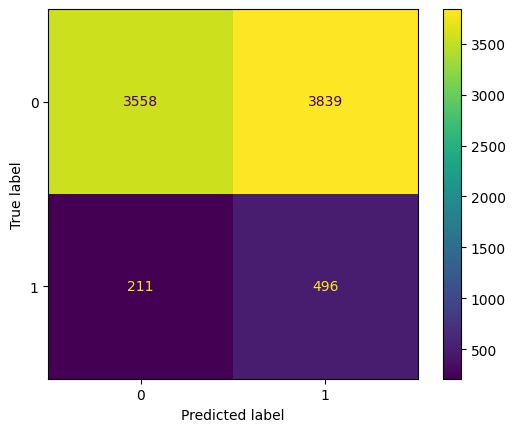

In [ ]:
modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(x_balanceada,y_balanceada)
y_previsto = modelo.predict(X_test)

print(classification_report(y_test,y_previsto))
ConfusionMatrixDisplay.from_predictions(y_test,y_previsto);